<a href="https://colab.research.google.com/github/sadrakhamoshi/CI-Course/blob/main/CI992_HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Your info

Full name: Sadra khamoshi far

Student ID: 97521261

Notice: **You can add new cells for each part.**

# Q1.A. Kohonen

epoch =====> 0 / 3200
epoch =====> 100 / 3200
epoch =====> 200 / 3200
epoch =====> 300 / 3200
epoch =====> 400 / 3200
epoch =====> 500 / 3200
epoch =====> 600 / 3200
epoch =====> 700 / 3200
epoch =====> 800 / 3200
epoch =====> 900 / 3200
epoch =====> 1000 / 3200
epoch =====> 1100 / 3200
epoch =====> 1200 / 3200
epoch =====> 1300 / 3200
epoch =====> 1400 / 3200
epoch =====> 1500 / 3200
epoch =====> 1600 / 3200
epoch =====> 1700 / 3200
epoch =====> 1800 / 3200
epoch =====> 1900 / 3200
epoch =====> 2000 / 3200
epoch =====> 2100 / 3200
epoch =====> 2200 / 3200
epoch =====> 2300 / 3200
epoch =====> 2400 / 3200
epoch =====> 2500 / 3200
epoch =====> 2600 / 3200
epoch =====> 2700 / 3200
epoch =====> 2800 / 3200
epoch =====> 2900 / 3200
epoch =====> 3000 / 3200
epoch =====> 3100 / 3200


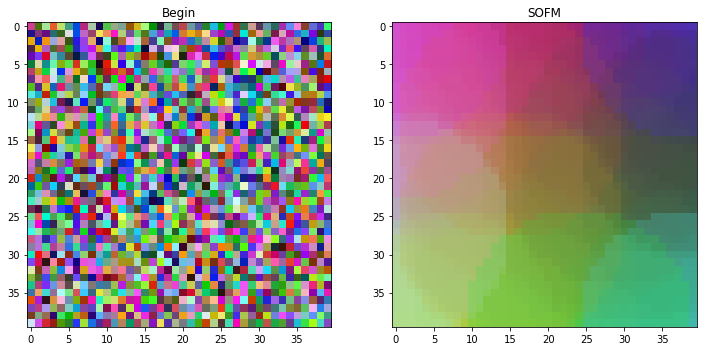

In [ ]:
#write your code here

## ***** NOTE : learning rate and radius not change and are constant ****** 


import matplotlib.pyplot as plt
import numpy as np

features = 3
data_num = 1600
epochs = 3200
learning_rate = 0.05
map_dimansion = (40, 40)
init_radius = max(map_dimansion[0],map_dimansion[1])
time_constant = epochs / np.log(init_radius)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121)
ax.title.set_text('Begin')

ax2 = fig.add_subplot(122)
ax2.title.set_text('SOFM')


def get_normal_data(data):
    normal_data = data / np.max(data)
    return normal_data


def get_data(input_dim=3):
    random_data_set = np.random.randint(0, 255, size=(data_num, input_dim))
    normalized_data = get_normal_data(random_data_set)
    return normalized_data


def initialize(map_dim, input_dim=3):
    x, y = map_dim
    weights = np.random.random((x, y, input_dim))
    return weights


# def update_radius(i):
#     return init_radius * np.exp(-i / time_constant)

# def update_learning_rate(i):
#     return learning_rate * np.exp(-i / time_constant)

def Gaussian_function(dist, radius):
    return np.exp(-dist / (2 * (radius**2)))

def get_bmu(x, w):
    diff = w - x
    diff = diff**2
    sum_diff = diff.sum(axis=2)
    ind = np.unravel_index(np.argmin(sum_diff, axis=None), sum_diff.shape)
    return ind


def update_weights(argmin, x, w, r, l, map_dim):
    x_dim, y_dim = map_dim
    idx = list(np.ndindex(x_dim, y_dim))
    idx_arr = np.array(idx).reshape((x_dim, y_dim, 2))
    diff = idx_arr - argmin
    diff_pow = diff**2
    sumd = diff_pow.sum(axis=2)
    dist = np.sqrt(sumd)
    out_of_radius = dist >= r
    dist[out_of_radius] = 0
    tmp = Gaussian_function(dist, r)
    tmp[out_of_radius] = 0
    gaussian = tmp.reshape((x_dim, y_dim, 1))
    dw = (l * gaussian) * (x - w)
    w = w + dw
    return w


def train(X, w):

    for i in range(epochs):
        # r = update_radius(i)
        # l = update_learning_rate(i)
        x = X[i % data_num]

        argmin = get_bmu(x, w)

        w = update_weights(argmin=argmin,
                           x=x,
                           w=w,
                           r=15.0,
                           l=learning_rate,
                           map_dim=map_dimansion)
        if i % 100 == 0 or i == epochs:
          print(f'epoch =====> {i} / {epochs}')
    ax2.imshow(w)

    return w


def main():
    data = get_data(input_dim= features)
    w = initialize(map_dim=map_dimansion, input_dim=features)
    ax.imshow(w)
    new_w = train(data, w)
    it = np.equal(new_w, w)
    plt.show()


if __name__ == '__main__':
    main()


# Q1.B. Kohonen

40
epoch =====> 0 / 3800
epoch =====> 100 / 3800
epoch =====> 200 / 3800
epoch =====> 300 / 3800
epoch =====> 400 / 3800
epoch =====> 500 / 3800
epoch =====> 600 / 3800
epoch =====> 700 / 3800
epoch =====> 800 / 3800
epoch =====> 900 / 3800
epoch =====> 1000 / 3800
epoch =====> 1100 / 3800
epoch =====> 1200 / 3800
epoch =====> 1300 / 3800
epoch =====> 1400 / 3800
epoch =====> 1500 / 3800
epoch =====> 1600 / 3800
epoch =====> 1700 / 3800
epoch =====> 1800 / 3800
epoch =====> 1900 / 3800
epoch =====> 2000 / 3800
epoch =====> 2100 / 3800
epoch =====> 2200 / 3800
epoch =====> 2300 / 3800
epoch =====> 2400 / 3800
epoch =====> 2500 / 3800
epoch =====> 2600 / 3800
epoch =====> 2700 / 3800
epoch =====> 2800 / 3800
epoch =====> 2900 / 3800
epoch =====> 3000 / 3800
epoch =====> 3100 / 3800
epoch =====> 3200 / 3800
epoch =====> 3300 / 3800
epoch =====> 3400 / 3800
epoch =====> 3500 / 3800
epoch =====> 3600 / 3800
epoch =====> 3700 / 3800


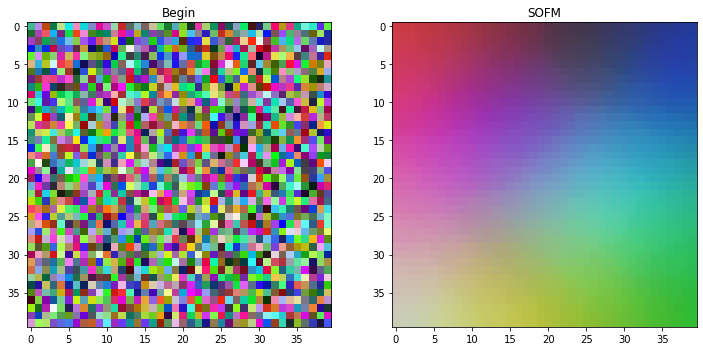

In [ ]:
#write your code here

## ***** NOTE : i combine both part b and c in first question it means both of learning rate and radius will change with time ***** 


import matplotlib.pyplot as plt
import numpy as np

features = 3
data_num = 1600
epochs = 3800
learning_rate = 0.05
map_dimansion = (40, 40)
print(map_dimansion[0])
init_radius = max(map_dimansion[0],map_dimansion[1])
time_constant = epochs / np.log(init_radius)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121)
ax.title.set_text('Begin')

ax2 = fig.add_subplot(122)
ax2.title.set_text('SOFM')


def get_normal_data(data):
    normal_data = data / np.max(data)
    return normal_data


def get_data(input_dim=3):
    random_data_set = np.random.randint(0, 255, size=(data_num, input_dim))
    normalized_data = get_normal_data(random_data_set)
    return normalized_data


def initialize(map_dim, input_dim=3):
    x, y = map_dim
    weights = np.random.random((x, y, input_dim))
    return weights


def update_radius(i):
    return init_radius * np.exp(-i / time_constant)


def update_learning_rate(i):
    return learning_rate * np.exp(-i / time_constant)


def Gaussian_function(dist, radius):
    return np.exp(-dist / (2 * (radius**2)))

def get_bmu(x, w):
    diff = w - x
    diff = diff**2
    sum_diff = diff.sum(axis=2)
    ind = np.unravel_index(np.argmin(sum_diff, axis=None), sum_diff.shape)
    return ind


def update_weights(argmin, x, w, r, l, map_dim):
    x_dim, y_dim = map_dim
    idx = list(np.ndindex(x_dim, y_dim))
    idx_arr = np.array(idx).reshape((x_dim, y_dim, 2))
    diff = idx_arr - argmin
    diff_pow = diff**2
    sumd = diff_pow.sum(axis=2)
    dist = np.sqrt(sumd)
    out_of_radius = dist >= r
    dist[out_of_radius] = 0
    tmp = Gaussian_function(dist, r)
    tmp[out_of_radius] = 0
    gaussian = tmp.reshape((x_dim, y_dim, 1))
    dw = (l * gaussian) * (x - w)
    w = w + dw
    return w


def train(X, w):

    for i in range(epochs):
        r = update_radius(i)
        l = update_learning_rate(i)
        x = X[i % data_num]

        argmin = get_bmu(x, w)

        w = update_weights(argmin=argmin,
                           x=x,
                           w=w,
                           r=r,
                           l=l,
                           map_dim=map_dimansion)
        if i % 100 == 0 or i == epochs:
          print(f'epoch =====> {i} / {epochs}')
    ax2.imshow(w)

    return w


def main():
    data = get_data(input_dim= features)
    w = initialize(map_dim=map_dimansion, input_dim=features)
    ax.imshow(w)
    new_w = train(data, w)
    it = np.equal(new_w, w)
    plt.show()


if __name__ == '__main__':
    main()

## Part C :
##  ****** NOTE : THIS PART IS A BIT DSICRIPTION FOR PART 3 OF FIRST QUESTION : IN HERE WE USE  update_radius(i) TO UPDATE THE RADIUS ****** 


# Q2.A. MLP

Streaming output truncated to the last 5000 lines.
Epoch 301/2800
9/9 [==============================] - 0s 6ms/step - loss: 0.1111 - accuracy: 0.0000e+00 - val_loss: 0.0580 - val_accuracy: 0.0000e+00
Epoch 302/2800
9/9 [==============================] - 0s 6ms/step - loss: 0.1154 - accuracy: 0.0000e+00 - val_loss: 0.0585 - val_accuracy: 0.0000e+00
Epoch 303/2800
9/9 [==============================] - 0s 6ms/step - loss: 0.1066 - accuracy: 0.0000e+00 - val_loss: 0.0587 - val_accuracy: 0.0000e+00
Epoch 304/2800
9/9 [==============================] - 0s 7ms/step - loss: 0.1045 - accuracy: 0.0000e+00 - val_loss: 0.0582 - val_accuracy: 0.0000e+00
Epoch 305/2800
9/9 [==============================] - 0s 6ms/step - loss: 0.1144 - accuracy: 0.0000e+00 - val_loss: 0.0577 - val_accuracy: 0.0000e+00
Epoch 306/2800
9/9 [==============================] - 0s 7ms/step - loss: 0.1142 - accuracy: 0.0000e+00 - val_loss: 0.0576 - val_accuracy: 0.0000e+00
Epoch 307/2800
9/9 [=============================

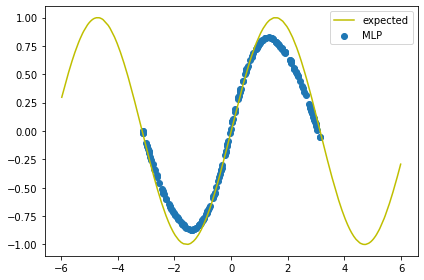

In [ ]:
#write your code here
from keras.layers import *
from keras.optimizers import *
from keras.models import Sequential
from keras.datasets import mnist
import numpy as np
import keras
import matplotlib.pyplot as plt


NUM_SAMPLES = 300
TEST_SAMPLES = 200
X_test = np.random.uniform(-np.pi, np.pi, TEST_SAMPLES)
X = np.random.uniform(-6.0, 6.0, NUM_SAMPLES)
X = np.sort(X, axis=0)
y = (np.sin(X) + 1) / 2

X = X.reshape((NUM_SAMPLES,1))
X_test = X_test.reshape((TEST_SAMPLES,1))
y = y.reshape((NUM_SAMPLES,1))

model = Sequential()
model.add(Dense(80, activation='relu',input_shape= (1,)))
model.add(Dense(40, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='SGD', loss='mean_squared_error', metrics=['accuracy'])
model.summary()

result = model.fit(x=X,y=y,epochs=2800,validation_split=0.1)
Y_predict = model.predict(X_test)


plt.plot(X.reshape(NUM_SAMPLES), 2*(y.reshape(NUM_SAMPLES)) -1 , 'y', label='expected')
plt.scatter(X_test.reshape(TEST_SAMPLES),2*( Y_predict.reshape(TEST_SAMPLES))-1, label='MLP')
plt.legend()
plt.tight_layout()
plt.show()

# Q2.B. RBF

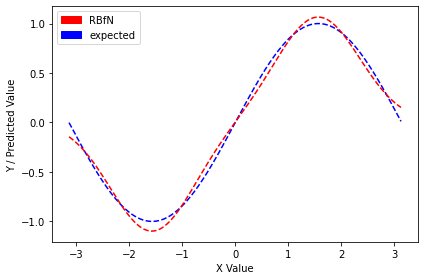

In [ ]:
#write your code here
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def compute_distance(X, centroids, k):
    new_X = X.reshape((X.shape[0],1))
    centroids = centroids.reshape((k, 1))
    distances = np.zeros((X.shape[0],k))
    for i in range(centroids.shape[0]):
        diff = np.linalg.norm(new_X - centroids[i, :], ord=None, axis=1)
        distances[:, i] = np.square(diff)
    return distances

def update_centroids(label, X, k):
    new_X = X.reshape((X.shape[0],1))
    new_centroids = np.zeros((k, new_X.shape[1]))
    for i in range(k):
        new_centroids[i, :] = np.mean(new_X[label == i, :], axis=0)
    return new_centroids.reshape(k)

## compute centeroid of k clusters
def compute_clusters(X, k):
    max_itration = 100000
    clusters = np.random.choice(np.squeeze(X), size=k)
    prevClusters = clusters.copy()
    converged = False
    itr = 0
    while (not converged) and (itr < max_itration):
        distances = compute_distance(X,clusters, k)
        closest_cluster_to_data = np.argmin(distances, axis=1)
        clusters = update_centroids(closest_cluster_to_data,X,k)
        converged = np.linalg.norm(clusters - prevClusters) < 1e-6
        prevClusters = clusters.copy()
    return clusters


## computes phis or radius of each cluster
def compute_phis(X, centroids):
    center = centroids.reshape((centroids.shape[0], 1))
    new_x = X.reshape(X.shape[0], 1)
    distances = np.zeros((new_x.shape[0], center.shape[0]))
    for i in range(center.shape[0]):
        diff = np.linalg.norm(new_x - center[i, :], axis=1)
        distances[:, i] = np.sqrt(diff)

    min_dist = np.argmin(distances, axis=1)
    radius = np.zeros(center.shape)
    for i in range(center.shape[0]):
        close_to_i = new_x[min_dist == i, :]
        centroid_i = center[i, :]
        diff = close_to_i - centroid_i
        diff = diff**2
        su = np.sum(diff, axis=1)
        su = np.sqrt(su)
        su = su.reshape((su.shape[0], 1))
        radius[i, :] = np.mean(su, axis=0)
    return radius.reshape(center.shape[0])


class RBFNet(object):
    def __init__(self, k=2, lr=0.01, epochs=150):
        self.k = k
        self.lr = lr
        self.epochs = epochs
        self.w = np.random.randn(k)
        self.b = np.random.randn(1)

    def forward_pass(self, x):
        c = self.centers.reshape((self.k, 1))
        ph = self.stds.reshape(c.shape)
        diff = c - x
        diff = diff**2
        s = np.sum(diff, axis=1)
        s = s.reshape((self.k, 1))
        s = np.sqrt(s)
        s = s / ph
        s = s**2
        rbff = np.exp((-1 / 2) * s)
        predict = rbff.T.dot(self.w) + self.b
        return rbff.reshape(self.k), predict

    def train(self, X, y):
        self.centers = compute_clusters(X, self.k)

        self.stds = compute_phis(X, self.centers)

        # training ( SGD )
        for epoch in range(self.epochs):
            loss = []
            for i in range(X.shape[0]):
                # forward pass
                a, predict = self.forward_pass(X[i])

                loss.append((y[i] - predict)**2)

                # backpropagation
                error = -(y[i] - predict)

                # online update
                self.w = self.w - self.lr * a * error
                self.b = self.b - self.lr * error

            avg_loss = np.mean(loss)
            # if epoch % 10 == 0 or epoch == 0:
            #     print(f'epoch ====> {epoch} , loss : {avg_loss}')

    def test(self, X):
        y_pred = []
        for i in range(X.shape[0]):
            bases, out = self.forward_pass(X[i])
            y_pred.append(out)
        return np.array(y_pred)


def main():
    x =  np.arange(-3.14, 3.14, 0.01)
    y = np.sin(x)

    rbfnet = RBFNet(lr=0.01, k=2)
    rbfnet.train(x, y)

    # x_new = np.arange(-4.0, 4.0, 0.01)
    y_new = np.sin(x)
    
    y_predict = rbfnet.test(x)

    red_patch = mpatches.Patch(color='red', label='RBfN')
    blue_patch = mpatches.Patch(color='blue', label='expected')

    plt.plot(x, y_new, 'b--', x, y_predict, 'r--')
    plt.ylabel('Y / Predicted Value')
    plt.xlabel('X Value')
    plt.legend(handles = [red_patch,blue_patch])

    plt.tight_layout()
    plt.show()
    return rbfnet

rbf = None

if __name__ == '__main__':
    rbf = main()


# Q2.C. Compare

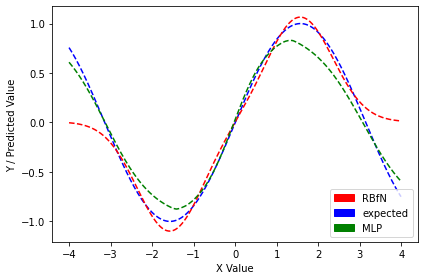

In [ ]:
#write your code here
x_new = np.arange(-4.0, 4.0, 0.01)
y_new = np.sin(x_new)
    
y_predict_rbfn = rbf.test(x_new)

y_predict_mlp = model.predict(x_new)

red_patch = mpatches.Patch(color='red', label='RBfN')
blue_patch = mpatches.Patch(color='blue', label='expected')
green_path = mpatches.Patch(color='green', label='MLP')

plt.plot(x_new, y_new, 'b--', x_new, y_predict_rbfn, 'r--', x_new, 2* y_predict_mlp -1 ,'g--' )
plt.ylabel('Y / Predicted Value')
plt.xlabel('X Value')
plt.legend(handles = [red_patch,blue_patch, green_path])

plt.tight_layout()
plt.show()

# <font color='red'>Submission</font>

1. Sign up in [Gradescope](https://www.gradescope.com) with proper name and student ID and use the following code to join the class: <font color='red'>**D5372R**</font>
2. Fill in your full name (seperated by single spaces) and student ID in the beginning of this notebook.
3. After you're done with this notebook, you should do the following:
  - Clear all outputs of the notebook.
  ![clear all outputs](https://i.ibb.co/y6FrttB/Screen-Shot-2021-03-21-at-01-51-42.png)
  - Run all of the cells (if you skipped a question just leave the cell unchanged), and make sure all of your outputs are correct.
  ![run all](https://i.ibb.co/cgRcBZ0/Screen-Shot-2021-03-21-at-01-54-58.png)
  - Save your notebook.
  
  - If you're using Colab, download your notebook.
  ![download ipynb](https://i.ibb.co/2KxYM6K/Screen-Shot-2021-03-21-at-02-03-50.png)
  
  - Put the notebook file you just downloaded and `convert.py` in the same folder run the following command:
  ```bash
  python convert.py
  ```
  This will export your code for each question into a `.py` file.
   

  according to the question number.
  - There are 2 assignments in Gradescope: 

    You should upload your **codes** and your **notebook** in `HW2` section and your final report for all of the questions as a **single pdf** file in `HW2 - Report`. Autograder will automatically check for:
    - `CI992_HW2.ipynb`
    - `Q1.A. Kohonen.py`
    - `Q1.B. Koohonen.py`
    - `Q2.A. MLP.py`
    - `Q2.B. RBF.py`
    - `Q2.C. Compare.py`
    - Your name and ID in the beginning of `.ipynb` file.

    It is important that you <font color='red'>**don't**</font> change the names of these files before submission.

4. If you pass the autograder, you're good to go.